In [88]:
# NOMBRE: STELLA ESPARZA TORREGROSA

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import sklearn as sk
from sklearn.datasets import load_digits

# Ejercicio 1

In [249]:
X=load_digits().data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### (a) Considera la primera fila de X (i.e. la primera imagen) y reestructúrala en forma matricial.

In [251]:
imagen_1 = X[0]
imagen_1_matricial = imagen_1.reshape(8, 8)
imagen_1_matricial

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### (b) Representa dicha imagen.

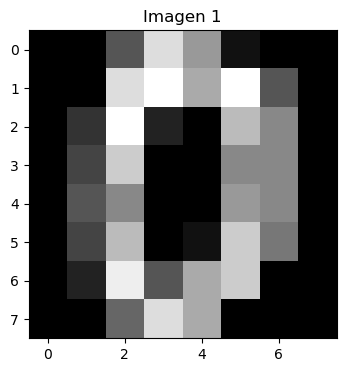

In [253]:
plt.figure(figsize=(4, 4))
plt.imshow(imagen_1_matricial, cmap='gray')
plt.title('Imagen 1')
plt.show()

### (c) Halla un vector que contenga la similitud entre dicha imagen y el resto de imágenes.

In [255]:
def distancia_coseno(a, b):
    return np.dot(a, b) / (la.norm(a) * la.norm(b))

In [257]:
# Distancia coseno entre la primera imagen y el resto
similitudes = np.array([distancia_coseno(primera_imagen, img) for img in X])
similitudes

array([1.        , 0.51910234, 0.61684198, ..., 0.71121668, 0.82580797,
       0.74430965])

### (d) Determina las imágenes que poseen una similitud con la primera imagen superior o igual al 97%.

In [259]:
umbral_similitud = 0.97
indices_alta_similitud = np.where(similitudes >= umbral_similitud)[0]

print(f"Número de imágenes con similitud >= {umbral_similitud}: {len(indices_alta_similitud)} imágenes")
print(f"Índices de estas imágenes: {indices_alta_similitud}")

Número de imágenes con similitud >= 0.97: 7 imágenes
Índices de estas imágenes: [   0  464  877 1029 1167 1365 1541]


### (e) Represéntalas para compararlas visualmente.

In [261]:
def plot_imagenes_similares(X, indices_alta_similitud, n_cols=5):
    n_images = len(indices_alta_similitud)
    n_rows = (n_images - 1) // n_cols + 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    fig.suptitle("Imágenes con similitud >= 97%", fontsize=16)
    
    for i, idx in enumerate(indices_alta_similitud):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        imagen = X[idx].reshape(8, 8)
        ax.imshow(imagen, cmap='gray')
        ax.set_title(f"Índice: {idx}")
        ax.axis('off')
    
    for i in range(n_images, n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

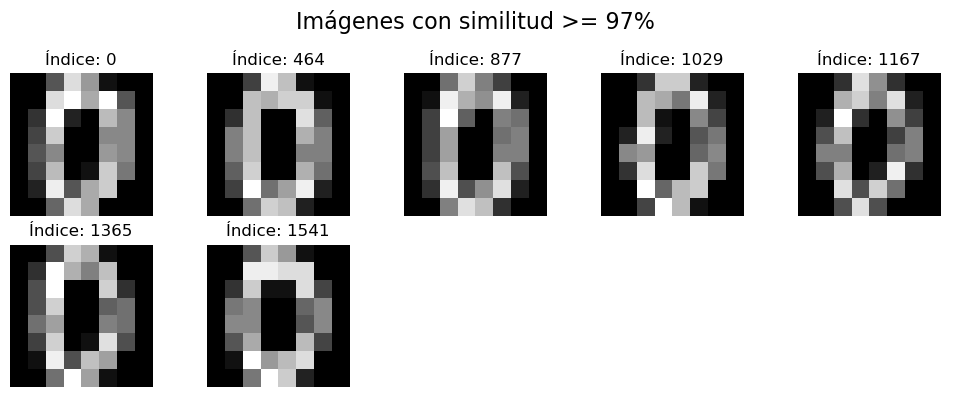

In [263]:
plot_imagenes_similares(X, indices_alta_similitud)

### (f) Halla la matriz de similitud entre todas las imágenes.

In [265]:
def calcular_matriz_similitud(X):
    n = X.shape[0]
    matriz_similitud = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            sim = distancia_coseno(X[i], X[j])
            matriz_similitud[i, j] = sim
            matriz_similitud[j, i] = sim
            
    return matriz_similitud

In [267]:
matriz_similitud = calcular_matriz_similitud(X)

print("Forma de la matriz de similitud:", matriz_similitud.shape)
print()
print(matriz_similitud)

Forma de la matriz de similitud: (1797, 1797)

[[1.         0.51910234 0.61684198 ... 0.71121668 0.82580797 0.74430965]
 [0.51910234 1.         0.79859118 ... 0.84372046 0.72334144 0.72538603]
 [0.61684198 0.79859118 1.         ... 0.84727621 0.70383842 0.7942196 ]
 ...
 [0.71121668 0.84372046 0.84727621 ... 1.         0.79544008 0.91695754]
 [0.82580797 0.72334144 0.70383842 ... 0.79544008 1.         0.83395856]
 [0.74430965 0.72538603 0.7942196  ... 0.91695754 0.83395856 1.        ]]


# Ejercicio 2

### (a) Si una matriz A de tamaño m x n, con m menor que n, entonces ¿podemos saber cuántos valores singulares no nulos tiene A?

El número de valores singulares no nulos puede variar, pero será como máximo m. No podemos saber con certeza cuántos valores singulares no nulos tiene la matriz solo con la información de sus dimensiones.

In [268]:
# Respaldamos la afirmación con lo siguiente:
def valores_singulares_no_nulos(A):
    return np.sum(la.svd(A, compute_uv=False))

m, n = 3, 5
A = np.random.rand(m, n)

print(f"Si por ejemplo tenemos uan matriz {m}x{n}:")
print(A, end="\n\n")

print(f"Valores singulares no nulos: {np.round(valores_singulares_no_nulos(A))}")
print(f"Este número puede variar, pero será como máximo m ({m})")

Si por ejemplo tenemos uan matriz 3x5:
[[0.43235887 0.19177729 0.14913548 0.1376175  0.82528076]
 [0.49786347 0.79930625 0.68416369 0.4124818  0.72136395]
 [0.15809631 0.87726252 0.7075377  0.90776181 0.65953695]]

Valores singulares no nulos: 3.0
Este número puede variar, pero será como máximo m (3)


### (b) Si una matriz A de tamaño m x n de rango máximo, con m menor que n, entonces ¿podemos saber cuántos valores singulares no nulos tiene A?

Como la matriz es de rango máximo y m < n, el número de valores singulares no nulos será exactamente m.

In [269]:
# Respaldamos la afirmación con lo siguiente:
def matriz_rango_maximo(m, n):
    return np.random.rand(m, n)
    
m, n = 3, 5
A = matriz_rango_maximo(m, n)

print(f"Si tenemos una matriz de rango máximo como esta:")
print(f"{A}", end="\n\n")
print(f"Valores singulares no nulos: {valores_singulares_no_nulos(A)}", end="\n\n")
print(f"Como la matriz es de rango máximo y m < n, el número de valores singulares no nulos será exactamente m: {m}")

Si tenemos una matriz de rango máximo como esta:
[[0.04896552 0.45077838 0.03215641 0.56822508 0.51848664]
 [0.25692287 0.2506276  0.38716445 0.01427099 0.80282653]
 [0.77999493 0.90071526 0.93236833 0.12987682 0.77976484]]

Valores singulares no nulos: 3.0840461347695505

Como la matriz es de rango máximo y m < n, el número de valores singulares no nulos será exactamente m: 3


### (c) Si una matriz A de tamaño m x n tiene todos sus valores singulares estrictamente positivos, ¿cuál es el rango de A?

Para una matriz con todos los valores singulares estrictamente positivos, el rango es igual al min(m, n), es decir:

Si m <= n, el rango de A será m

Si m > n, el rango de A será n

In [270]:
# Respaldamos la afirmación con lo siguiente:
def matriz_valores_singulares_positivos(m, n):
    U, _, Vt = la.svd(np.random.rand(m, n), full_matrices=False)
    S = np.diag(np.arange(1, min(m, n) + 1))
    return U @ S @ Vt

m, n = 4, 3
A = matriz_valores_singulares_positivos(m, n)
rango = la.matrix_rank(A)

print(f"Si tenemos una matriz {m}x{n} con valores singulares positivos:")
print(A)
print(f"Rango de la matriz: {rango}", end="\n\n")

print(f"Para una matriz con todos los valores singulares estrictamente positivos, el rango es igual al min(m, n)")

Si tenemos una matriz 4x3 con valores singulares positivos:
[[-1.59206633  1.5418611   1.12771316]
 [ 1.19436175 -0.02870373 -0.61371783]
 [ 0.94940577 -1.10511863  1.52035464]
 [-0.24607504  1.2318234   0.01414818]]
Rango de la matriz: 3

Para una matriz con todos los valores singulares estrictamente positivos, el rango es igual al min(m, n)


### (d) Sea A una matriz de dimensión 70 x 70 tal que su diagonal está compuesta por 0 y fuera de la diagonal todas sus entradas valen 1. Comprueba que el vector (1, 1, ... , 1) es un vector propio de A. ¿Cuál es su valor propio asociado?

El vector v = (1, 1, ..., 1) es un vector propio de la matriz A descrita. El valor propio asociado es 69, (como vamos a calcular más adelante para confirmar esto). El código verifica que A * v es igual a 69 * v, lo que prueba que v es un vector propio con valor propio 69.

In [271]:
# Respaldamos la afirmación con lo siguiente:
n = 70
A = np.ones((n, n)) - np.eye(n)
v = np.ones(n)

resultado = A @ v
valor_propio = resultado[0] / v[0]

print(f"Si tenemos una matriz {n}x{n} tal que su diagonal está compuesta por 0 y fuera de su diagonal son todo 1s:")
print(A, end="\n\n")

print(f"A * v = {resultado[:10]}... (mostrando solo los 10 primeros elementos)")
print(f"Valor propio = {valor_propio}")

es_vector_propio = np.allclose(resultado, valor_propio * v)
print(f"¿Es v un vector propio de A? {es_vector_propio}", end="\n\n")

print(f"Confirmamos que el vector v = (1, 1, ..., 1) es un vector propio de la matriz A descrita. El valor propio asociado es 69, como habíamos calculado anteriormente. El código verifica que A * v es igual a 69 * v, lo que prueba que v es un vector propio con valor propio 69.")

Si tenemos una matriz 70x70 tal que su diagonal está compuesta por 0 y fuera de su diagonal son todo 1s:
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]

A * v = [69. 69. 69. 69. 69. 69. 69. 69. 69. 69.]... (mostrando solo los 10 primeros elementos)
Valor propio = 69.0
¿Es v un vector propio de A? True

Confirmamos que el vector v = (1, 1, ..., 1) es un vector propio de la matriz A descrita. El valor propio asociado es 69, como habíamos calculado anteriormente. El código verifica que A * v es igual a 69 * v, lo que prueba que v es un vector propio con valor propio 69.
